This notebook compares the NEMO bottom w-depth to the depth specified in the bathymetry file. We speculate that NEMO somehow shallows out the bathymetry.

In [1]:
import netCDF4 as nc
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

Load mesh_mask file and bathymetry file.

In [2]:
grid = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
bathy =grid.variables['Bathymetry'][:]

mesh = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask_SalishSea2.nc')
mbathy = mesh.variables['mbathy'][0,:,:] 
#used to calculate number of vertical ocean grid cells at each (i,j) (1=land point)
gdepw = mesh.variables['gdepw'][0,:,:,:]
e3t = mesh.variables['e3t'][0,:,:,:] #grid spacing
surface_tmask = mesh.variables['tmask'][0,0,:,:]
surface_tmask = np.abs(surface_tmask-1)

Use mbathy to find ocean bottom point on w-grid. This is the NEMO bathymetry. Also look up grid spacing of t-point just above.

In [15]:
NEMO_bathy = np.zeros(bathy.shape)
bottom_e3t = np.zeros(bathy.shape) 
for i in np.arange(NEMO_bathy.shape[1]):
    for j in np.arange(NEMO_bathy.shape[0]):
        level = mbathy[j,i]
        NEMO_bathy[j,i] = gdepw[level,j,i]
        bottom_e3t[j,i] = e3t[level-1, j,i]
NEMO_bathy = np.ma.masked_array(NEMO_bathy, mask = surface_tmask)
bottom_e3t = np.ma.masked_array(bottom_e3t, mask = surface_tmask)

Plot difference between NEMO bathy and bathy on file.

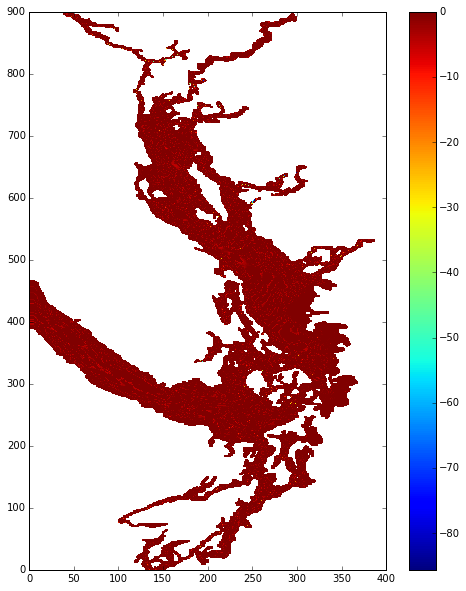

In [4]:
fig,ax=plt.subplots(1,1,figsize=(8,10))
diff = NEMO_bathy-bathy
mesh =ax.pcolormesh(diff)
plt.colorbar(mesh, ax=ax)

Some stats

In [5]:
np.min(diff)

-85.618408203125

In [6]:
np.max(diff)

4.673004150390625e-05

## Shallower NEMO bathymetry

In [7]:
shallower_diffs = diff[diff<0]
np.mean(shallower_diffs)

-2.348981674421212

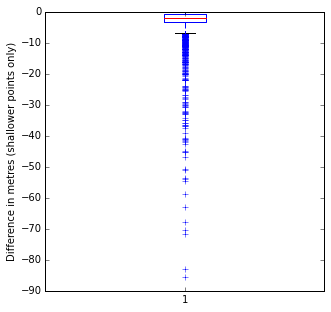

In [8]:
fig,ax=plt.subplots(1,1,figsize=(5,5))
ax.boxplot(shallower_diffs)
ax.set_ylabel('Difference in metres (shallower points only)')

Where is the NEMO bathy shallower? How many gridpoints are shallower?

In [9]:
inds = np.where(diff<0)
inds[0].shape

(15368,)

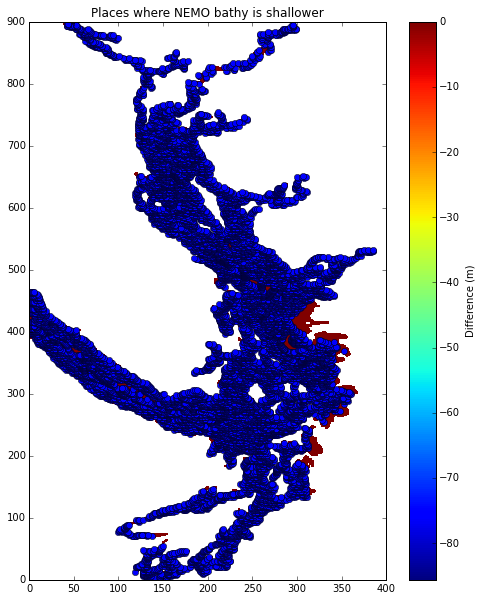

In [10]:
fig,ax=plt.subplots(1,1,figsize=(8,10))
mesh =ax.pcolormesh(diff)
ax.plot(inds[1],inds[0],'bo')
cbar = plt.colorbar(mesh, ax=ax)
cbar.set_label('Difference (m)')
ax.set_title('Places where NEMO bathy is shallower')

Where is NEMO bathymetry shallower by more than grid the tgrid spacing of bottom cell?

In [11]:
inds = np.where(diff<-bottom_e3t)
inds[0].shape

(181,)

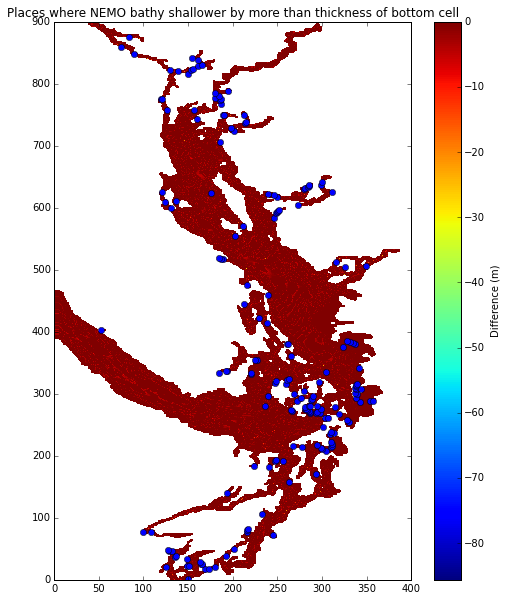

In [12]:
fig,ax=plt.subplots(1,1,figsize=(8,10))
mesh =ax.pcolormesh(diff)
ax.plot(inds[1],inds[0],'bo')
cbar = plt.colorbar(mesh, ax=ax)
cbar.set_label('Difference (m)')
ax.set_title('Places where NEMO bathy shallower by more than thickness of bottom cell')

I'm not sure if we can justify deepening almost everywhere by the ammount that we did.

Where is NEMO bathy shallower by more than 10 m?

In [13]:
inds = np.where(diff<-10)
inds[0].shape

(225,)

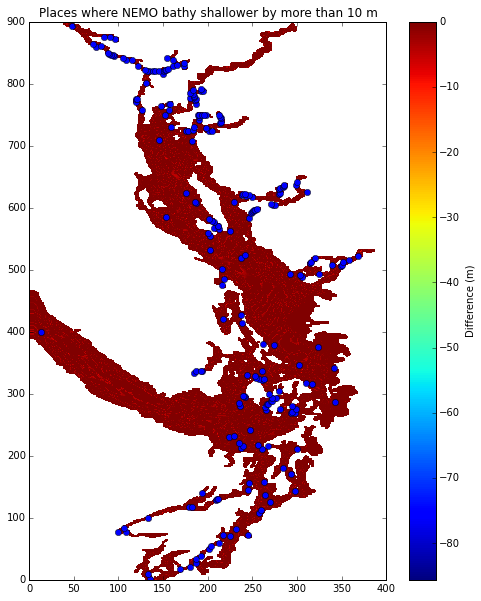

In [14]:
fig,ax=plt.subplots(1,1,figsize=(8,10))
mesh =ax.pcolormesh(diff)
ax.plot(inds[1],inds[0],'bo')
cbar = plt.colorbar(mesh, ax=ax)
cbar.set_label('Difference (m)')
ax.set_title('Places where NEMO bathy shallower by more than 10 m')